In [1]:
import ImarisLib

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def GetObjectId():
    
    
    vImarisLib = ImarisLib.ImarisLib()
    vServer = vImarisLib.GetServer()
    vNumberOfObjects = vServer.GetNumberOfObjects()
    
    for vIndex in range(vNumberOfObjects):
        vObjectId = vServer.GetObjectID(vIndex)
        return vObjectId; # work with the ID (return first one)
    
    return -1 # invalid id

In [4]:
aImarisId = GetObjectId()
vImarisLib = ImarisLib.ImarisLib()
vImaris = vImarisLib.GetApplication(aImarisId)
vDataSet = vImaris.GetDataSet()

In [5]:
imaris_file = vImaris.GetCurrentFileName()
imaris_file.split('\\')[-1].split('.')[0]

'CFAOVAD3 FN AF488 Th1 CMTMR Kalman_A01_G006_0001'

## Get Volume Data

In [6]:
data = vDataSet.GetDataVolumeFloats(aIndexC=3, aIndexT=0)
data = np.array(data)

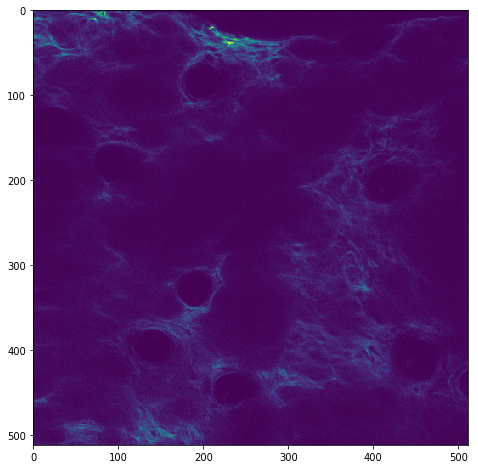

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(data[...,0]);

## Get Statistics

In [8]:
from cvbi.base_imaris.stats import get_imaris_statistics

In [9]:
df = get_imaris_statistics(vImaris=vImaris, object_type='surfaces', object_name='Th1')

In [14]:
df.head(2)

names,trackID,objectID,Acceleration,Acceleration Reference Frame,Acceleration X,Acceleration X Reference Frame,Acceleration Y,Acceleration Y Reference Frame,Acceleration Z,Acceleration Z Reference Frame,...,Velocity Angle Z,Velocity Angle Z Reference Frame,Velocity X,Velocity X Reference Frame,Velocity Y,Velocity Y Reference Frame,Velocity Z,Velocity Z Reference Frame,Volume,time
0,1000015177,15177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,155.462463,155.462463,0.018695,0.018695,-0.026583,-0.026583,-0.071173,-0.071173,196.105911,1.0
1,1000015177,15397,0.000911,0.000911,-0.000266,-0.000266,0.000729,0.000729,0.000477,0.000477,...,167.875275,167.875275,0.011025,0.011025,-0.005532,-0.005532,-0.057393,-0.057393,175.667618,2.0


## 